In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import dblquad, tplquad

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# Analytical Case:

Here, we'll consider the case of a spinning top whose radius is a function of an angle $\theta$. The region of interest is $\theta \in [\pi/4,\pi/2]$

In [3]:
def f(theta):
    return 1 - np.pi / 4 + theta ** (1 / 10)

theta = np.linspace(np.pi / 4, np.pi / 2, 1000)

Text(0.5, 1.0, 'Side of Spinning Top [Cyl. Coords]')

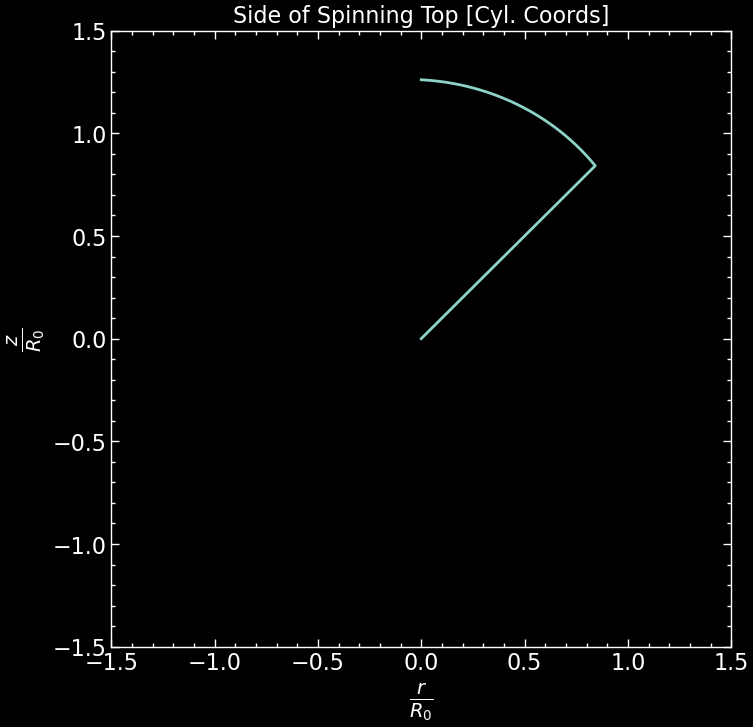

In [4]:
plt.figure(figsize = (8, 8))
plt.plot(np.insert(f(theta) * np.cos(theta), 0, 0), np.insert(f(theta) * np.sin(theta), 0, 0))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()

plt.xlabel(r'$\frac{r}{R_0}$', fontsize = 20)
plt.ylabel(r'$\frac{z}{R_0}$', fontsize = 20)
plt.title(r'Side of Spinning Top [Cyl. Coords]')

The Kinetic Energy of the Spinning Top with its tip fixed on the plane is given by $$T=\frac 1 2 L^T IL=\frac 1 2 \begin{bmatrix} L_x & L_y & L_z \end{bmatrix} \begin{bmatrix} I_{xx} & I_{xy} & I_{xz} \\ I_{yx} I_{yy} & I_{yz} \\ I_{zx} & I_{zy} & I_{zz} \end{bmatrix}$$ for the Vector representing Angular Momentum $\vec L$, whose magnitudes are used in this form.

# MOI about $z$-axis:

$$I_{zz}=\iiint \rho(x,y,z)(x^2+y^2)\,dV=\int_z \int_r \int_0^{2\pi} \rho(r,z)r^2\cdot r\,d\phi drdz=2\pi\int_r \int_z \rho(r,z)r^3\,drdz$$
Let $R=\sqrt{r^2+z^2}$ and $\beta=\arctan(z/r)$ and the boundary be given by $R_E(\beta)$ so that $$I_{zz}=2\pi \int_\beta \int_0^{R_E(\beta)} \rho(R,\beta)R^4 \cos^3(\beta)\,dRd\beta$$
Let $R'=R/R_0$ and $\rho(R,\beta)=\rho_0h(R,\beta)$. The Mass is given by $$M=\iiint \rho(x,y,z)\,dV=2\pi \int_\beta \int_0^{R_E(\beta)} \rho(R,\beta)R^2 \cos(\beta)\,dRd\beta$$ so that $$\frac{M}{\rho_0 R_0^3}=2\pi \int_\beta \int_0^{R_E'(\beta)} h(R',\beta)R'^2 \cos(\beta)\,dR'd\beta$$
So then we finally get $$\frac{I_{zz}}{MR_0^2}=\frac{2\pi \int_\beta \int_0^{R_E'(\beta)} h(R',\beta)R'^4 \cos^3(\beta)\,dR'd\beta}{2\pi \int_\beta \int_0^{R_E'(\beta)} h(R',\beta)R'^2 \cos(\beta)\,dR'd\beta}$$

In [13]:
def integrand_Izz(R, beta):
    return R ** 4 * np.cos(beta) ** 3
def integrand_M(R, beta):
    return R ** 2 * np.cos(beta)

Curve: $h'=1$, $\beta \in [\pi/4,\pi/2]$ and $R_E'(\beta)=1$

In [14]:
numerator = dblquad(integrand_Izz, np.pi / 4, np.pi / 2, lambda x:0, lambda x: f(x))[0]
denominator = dblquad(integrand_M, np.pi / 4, np.pi / 2, lambda x:0, lambda x: f(x))[0]

Izz_MR2 = numerator / denominator
Izz_MR2

0.22652131755212312

# MOI about $x/y$-axis:

$$I_{xx}=\iiint \rho(x,y)(z^2+y^2)\,dV=\int_z \int_r \int_0^{2\pi} \rho(r,z)(z^2+r^2\sin^2\phi)r\,d\phi drdz$$
We equilvalently get the final expression $$\frac{I_{xx}}{MR_0^2}=\frac{I_{yy}}{MR_0^2}=\frac{\int_\beta \int_0^{R_E'(\beta)} \int_0^{2\pi}h(R',\beta)(\sin^2 \beta + \cos^2 \beta \sin^2 \phi)R'^4\cos(\beta)\,d\phi dR'd\beta}{2\pi \int_\beta \int_0^{R_E'(\beta)} h(R',\beta)R'^2 \cos(\beta) dR'd\beta}$$

In [15]:
def integrand_Ixx(phi, R, beta):
    return (np.sin(beta) ** 2 + (np.cos(beta) * np.sin(phi)) ** 2) * R ** 4 * np.cos(beta)

Curve: $h'=1$, $\beta \in [\pi/4,\pi/2]$ and $R_E'(\beta)=1$

In [16]:
numerator = tplquad(integrand_Ixx, np.pi / 4, np.pi / 2,
              lambda x:0, lambda x: f(x),
              lambda x, y: 0, lambda x, y: 2 * np.pi)[0]

denominator = 2 * np.pi * dblquad(integrand_M, np.pi/4, np.pi/2,
              lambda x:0, lambda x: f(x))[0]

Ixx_MR2 = numerator / denominator
Ixx_MR2

0.7786873256282014

# Products of Inertia (Off-Diagonal Terms):
$$I_{xy}=-\iiint \rho(x,y,z)xy\,dxdydz=-\iint \bigg\{\int_{-f(z)}^{f(z)} \rho(x,y,z)x\,dx \bigg\}y\,dydz$$ 
$\rho$ is even in $x$ by Cylindrical Symmetry and thus $\rho(x,y,z)$ is an odd function integrated over a symmetric bound. The Integral is thus zero.

This can be applied to all cross terms: $$I_{xy}=I_{yx}=I_{yz}=I_{zy}=I_{xz}=I_{zx}=0$$

In [17]:
I_MR02 = np.diag([Ixx_MR2, Ixx_MR2, Izz_MR2])
I_MR02

array([[0.77868733, 0.        , 0.        ],
       [0.        , 0.77868733, 0.        ],
       [0.        , 0.        , 0.22652132]])